In [28]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt

import warnings
warnings.filterwarnings('ignore')
sns.set_palette(['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])

In [29]:
import os
import pandas as pd

# Path to the directory containing CSV files
csv_directory = '/Users/xalpha/Desktop/ecommerce_sales-main/dataset'

# Get a list of CSV files in the directory
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

# Initialize an empty DataFrame
df = pd.DataFrame()

# Loop through each CSV file and concatenate to the DataFrame
for csv_file in csv_files:
    csv_path = os.path.join(csv_directory, csv_file)
    data = pd.read_csv(csv_path, encoding='latin1')  # Specify the correct encoding
    df = pd.concat([df, data], ignore_index=True)  # Concatenate and ignore existing indices

# Display the shape of the concatenated DataFrame
print("Concatenated DataFrame Shape:", df.shape)

# Save the DataFrame to a Jupyter Notebook
notebook_path = '/Users/xalpha/Desktop/ecommerce_sales-main/Untitled.ipynb'
df.to_pickle(notebook_path)


Concatenated DataFrame Shape: (161733, 6)


In [30]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
161728,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
161729,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
161730,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
161731,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [31]:
df.sample(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
27652,159348,Apple Airpods Headphones,1,150,02/09/19 09:58,"346 8th St, Los Angeles, CA 90001"
95709,262938,27in 4K Gaming Monitor,1,389.99,10/12/19 09:25,"406 5th St, San Francisco, CA 94016"
131992,257684,Macbook Pro Laptop,1,1700,09/30/19 14:24,"422 Forest St, Los Angeles, CA 90001"


# Data Cleaning

In [32]:
#Check null values
df.isna().sum()

Order ID            465
Product             465
Quantity Ordered    465
Price Each          465
Order Date          465
Purchase Address    465
dtype: int64

In [33]:
#Check null values
df[df.isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
161728,NaN,NaN,NaN,NaN,NaN,NaN
161729,NaN,NaN,NaN,NaN,NaN,NaN
161730,NaN,NaN,NaN,NaN,NaN,NaN
161731,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#Drop null vales
df = df.dropna()

In [35]:
df.sample(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
30010,161615,AA Batteries (4-pack),2,3.84,02/18/19 20:22,"489 Adams St, Los Angeles, CA 90001"
29099,160759,AAA Batteries (4-pack),2,2.99,02/18/19 13:50,"553 Walnut St, Seattle, WA 98101"
99733,266794,Wired Headphones,1,11.99,10/17/19 18:13,"354 5th St, Austin, TX 73301"


# Data Preparation

In [36]:
#Exclude header for each dataset inside dataframe
df = df[df['Order ID'] != 'Order ID']
df = df.reset_index()
df = df.drop(columns='index')

#Correcting data types
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')
df['Price Each'] = df['Price Each'].astype('float')
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [23]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
160956,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215"
160957,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001"
160958,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016"
160959,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016"


In [37]:
#Adding new feature
def feature_extraction(data):
    
    # funtction to get the city in the data
    def get_city(address):
        return address.split(',')[1]
    
    # funtction to get the state in the data
    def get_state(address):
        return address.split(',')[2].split(' ')[1]

    # let's get the year data in order date column
    data['Year'] = data['Order Date'].dt.year
    
    # let's get the month data in order date column
    data['Month'] = data['Order Date'].dt.month
    
    # let's get the houe data in order date column
    data['Hour'] = data['Order Date'].dt.hour 
    
    # let's get the minute data in order date column
    data['Minute'] = data['Order Date'].dt.minute 
    
    # let's make the sales column by multiplying the quantity ordered colum with price each column
    data['Sales'] = data['Quantity Ordered'] * data['Price Each'] 
    
    # let's get the cities data in order date column
    data['Cities'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 
    
    return data 

In [39]:
df = feature_extraction(df)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,46,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,30,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,9,27,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...,...,...
160956,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",2019,6,19,2,2.99,Boston (MA)
160957,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",2019,6,19,29,149.99,New York City (NY)
160958,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",2019,6,18,57,11.95,San Francisco (CA)
160959,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",2019,6,18,35,11.95,San Francisco (CA)


# Analysis

# Descriptive analysis

In [40]:
df = df[df['Year']==2019]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160961 entries, 0 to 160960
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          160961 non-null  object        
 1   Product           160961 non-null  object        
 2   Quantity Ordered  160961 non-null  int64         
 3   Price Each        160961 non-null  float64       
 4   Order Date        160961 non-null  datetime64[ns]
 5   Purchase Address  160961 non-null  object        
 6   Year              160961 non-null  int64         
 7   Month             160961 non-null  int64         
 8   Hour              160961 non-null  int64         
 9   Minute            160961 non-null  int64         
 10  Sales             160961 non-null  float64       
 11  Cities            160961 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 16.0+ MB


In [41]:
total_year_order = df.shape[0]
total_product_sold = df['Quantity Ordered'].sum()
total_year_sales = df['Sales'].sum()

print(f'Total orders in 2019 : {total_year_order:,} orders')
print(f'Total products sold in 2019 : {total_product_sold:,} items')
print(f'Total sales in 2019 : {total_year_sales:,} USD')

Total orders in 2019 : 160,961 orders
Total products sold in 2019 : 180,958 items
Total sales in 2019 : 29,872,738.849999998 USD


# Multivariate Analysis

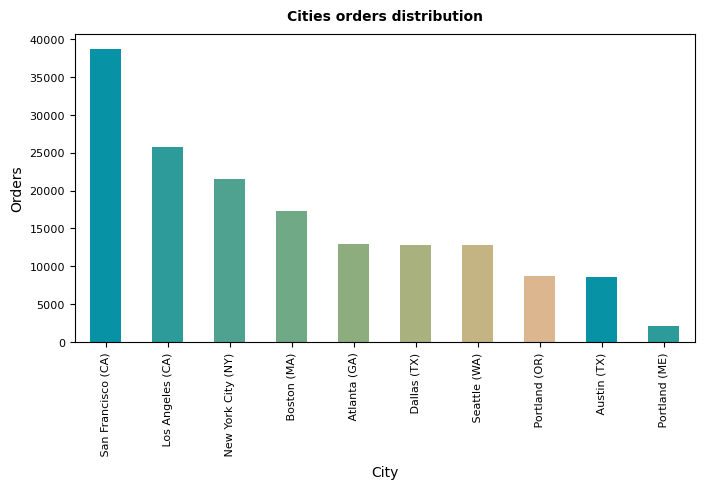

In [77]:
plt.figure(figsize=(8,4))

df['Cities'].value_counts().plot(kind='bar', color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'], fontsize=8)
# sns.countplot(df['Cities'])
plt.title('Cities orders distribution',weight='bold',fontsize=10,pad=10)
plt.ylabel('Orders',fontsize=10)
plt.xlabel('City',fontsize=10)
plt.show()

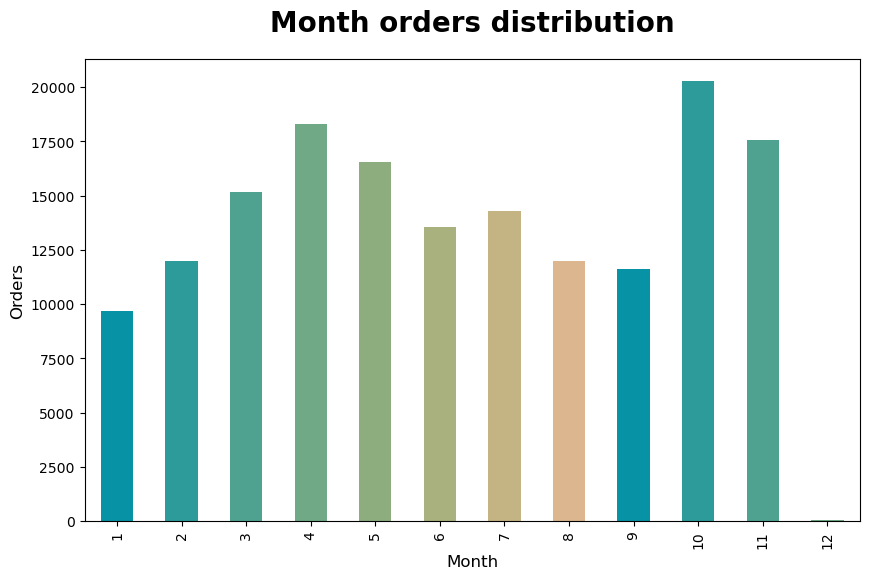

In [44]:
plt.figure(figsize=(10,6))
df['Month'].value_counts().sort_index().plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Month orders distribution',weight='bold',fontsize=20,pad=20)
plt.ylabel('Orders',fontsize=12)
plt.xlabel('Month',fontsize=12)
plt.show()

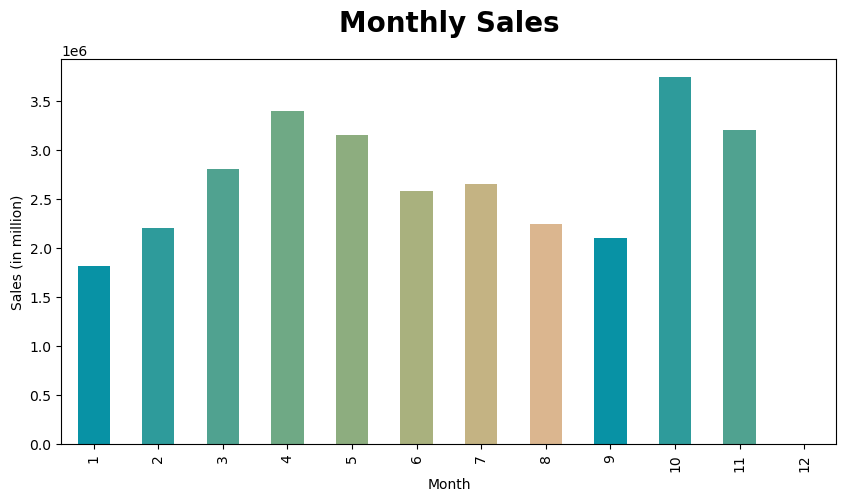

In [45]:
df_month = df.groupby('Month')['Sales'].sum()
plt.figure(figsize=(10,5))
df_month.plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Monthly Sales',weight='bold',fontsize=20,pad=20)
plt.ylabel('Sales (in million)')
plt.show()

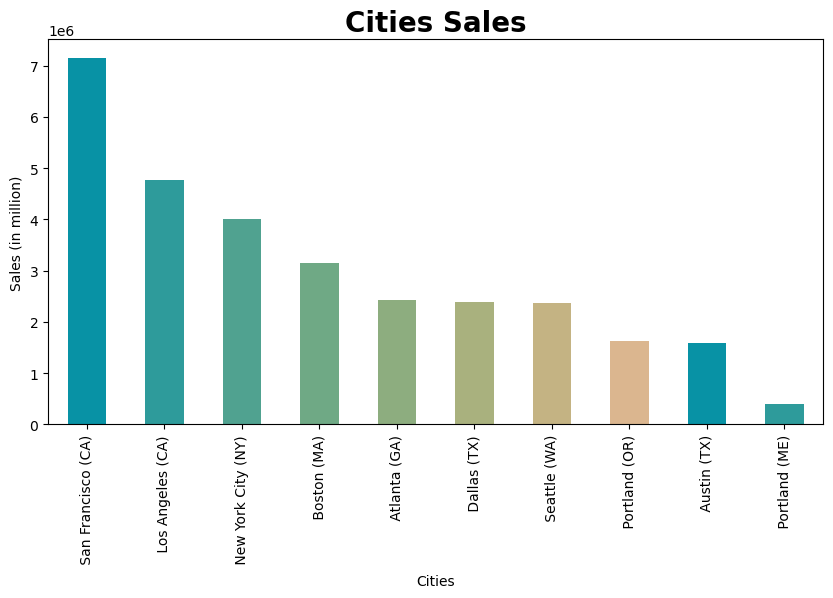

In [46]:
df_city = df.groupby('Cities')['Sales'].sum()
plt.figure(figsize=(10,5))
df_city.sort_values(ascending=False).plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Cities Sales',weight='bold',fontsize=20)
plt.ylabel('Sales (in million)')

plt.show()

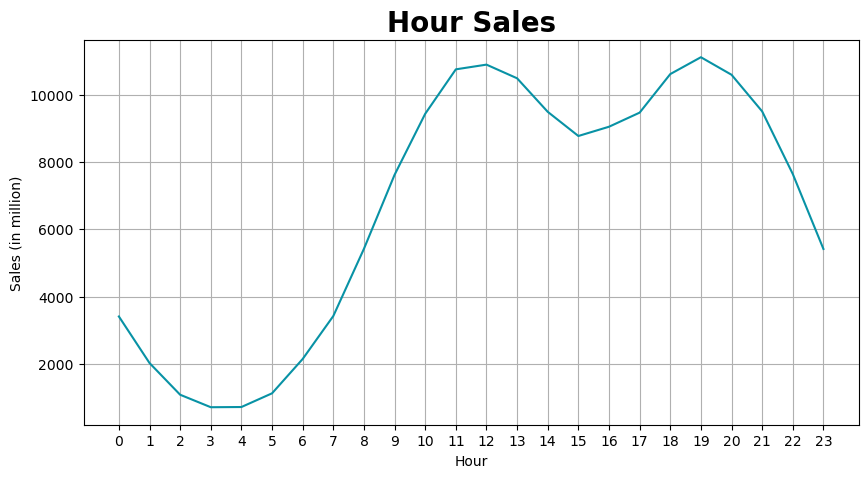

In [47]:
df_hour = df.groupby('Hour')['Quantity Ordered'].count()
plt.figure(figsize=(10,5))
plt.plot(df_hour.index,df_hour.values)
plt.title('Hour Sales',weight='bold',fontsize=20)
plt.grid(True)
plt.xticks(ticks=df_hour.index)
plt.ylabel('Sales (in million)')
plt.xlabel('Hour')


plt.show()

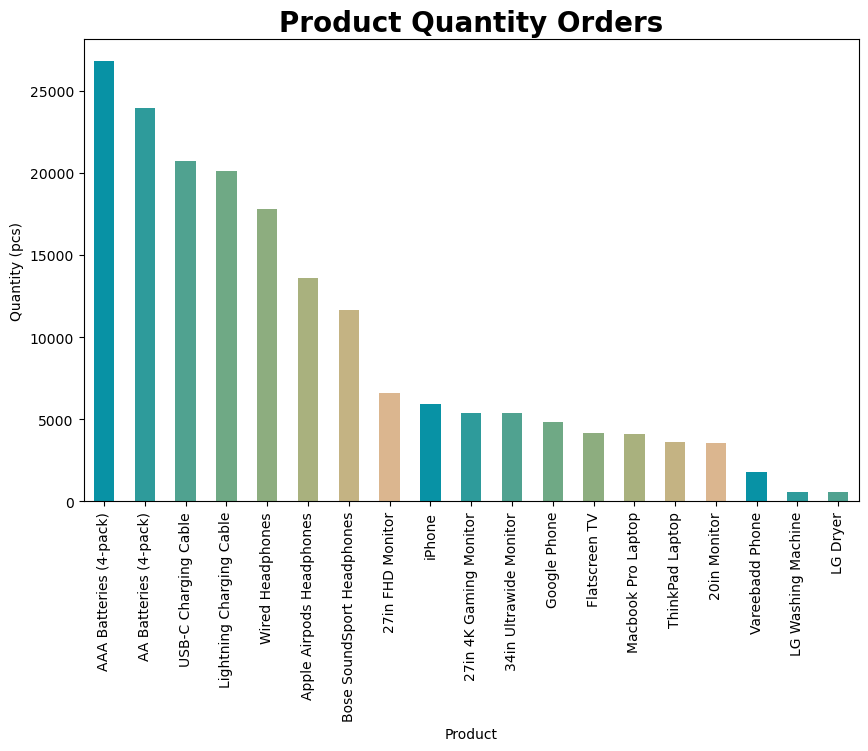

In [48]:
df_product = df.groupby('Product')['Quantity Ordered'].sum()
df_product = df_product.sort_values(ascending=False)

plt.figure(figsize=(10,6))
df_product.plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Product Quantity Orders',weight='bold',fontsize=20)

plt.ylabel('Quantity (pcs)')

plt.show()

# Market basket analysis

In [49]:
from itertools import combinations
from collections import Counter

# drop it using duplicated() funct
data = df[df['Order ID'].duplicated(keep=False)]
# create a new column
data['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# # let's make a new variable
data = data[['Order ID', 'Grouped']].drop_duplicates()
# # create a new variable for Counter
count = Counter()
# # make a for loop
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
# # and make another for loop    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 892
('Google Phone', 'USB-C Charging Cable') 869
('iPhone', 'Wired Headphones') 381
('Google Phone', 'Wired Headphones') 358
('iPhone', 'Apple Airpods Headphones') 308
('Vareebadd Phone', 'USB-C Charging Cable') 308
('Google Phone', 'Bose SoundSport Headphones') 193
('USB-C Charging Cable', 'Wired Headphones') 135
('Vareebadd Phone', 'Wired Headphones') 121
('Lightning Charging Cable', 'Wired Headphones') 81


In [55]:
data

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
160909,222863,"27in FHD Monitor,Bose SoundSport Headphones"
160915,222868,"iPhone,Apple Airpods Headphones"
160930,222882,"Apple Airpods Headphones,AA Batteries (4-pack)"
160933,222884,"Google Phone,USB-C Charging Cable"


In [ ]:
to have the order counts of the most combinedly bought products


In [66]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,8,46,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,22,30,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,14,38,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,9,27,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...,...,...,...
160956,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",2019,6,19,2,2.99,Boston (MA)
160957,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",2019,6,19,29,149.99,New York City (NY)
160958,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",2019,6,18,57,11.95,San Francisco (CA)
160959,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",2019,6,18,35,11.95,San Francisco (CA)
